In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.physical_ratios import cm_per_kpc, K_per_keV
from yt.units import mp
import pyxsim
import soxs
import aplpy
import os
import matplotlib.colors as mcolors
import matplotlib.cm

/home/aditiv/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aditiv/anaconda3/lib/python3.6/site-packages/yt/analysis_modules/cosmological_observation/api.py:22: VisibleDeprecationWarning: Development of the LightRay module has been moved to the Trident package. This version is deprecated and will be removed from yt in a future release. See https://github.com/trident-project/trident for further information.
  from .light_ray.api import \
/home/aditiv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(me

In [2]:
plt.rcParams['font.size']=22
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
Msun     = 2.e33
ks       = 1.e3
area     = (2000.0, "cm**2") # collecting area
dist     = (1.0, "Mpc")
RA,dec   = (349.60, -42.0) 
nH       = 1.93e-2  #in units of 10^22 /cm/cm
Bins     = np.arange(0.0, 5., 1.e-3)
bins     = np.arange(0.0, 5., 0.13)
t        = 100 * ks    
exp_time = (t, "s") # exposure time

In [4]:

base     = "/home/aditiv/CGM/Pyxsim/Data/"

folder   = [ "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/", "HR_0821_1e-6_SFR3/"]
filename = ["DD0070/sb_0070", \
            "DD0090/sb_0090", \
            "DD0110/sb_0110", \
            "DD0130/sb_0130", \
            "DD0150/sb_0150", \
            "DD0220/sb_0220", \
            "DD0300/sb_0300", \
            "DD0400/sb_0400", \
            "DD0500/sb_0500"]

time = ['700 Myr', '900 Myr', '1.1 Gyr', '1.3 Gyr', '1.5 Gyr',\
         '2.2 Gyr', '3.0 Gyr', '4.0 Gyr', '5.0 Gyr']

In [5]:
simmass = np.zeros((len(filename)))

for f in folder:
    for file in filename:
        file_loc = base + f + file
        
        if(os.path.exists(file_loc)):
            outfile  = f + file.split('/')[0] + '/'
            
    
    
            ds       = yt.load(file_loc)
            print("File found!", file_loc)
            
            sp        = ds.sphere('c',(50,'kpc'))
            cr1       = sp.cut_region(" (obj['z'].in_units('kpc')<6) & (obj['z'].in_units('kpc')>-6)\
                               & (obj['radius'].in_units('kpc')<20)  " )

            sim_cr    = sp - cr1

            simmass   = sim_cr.quantities.total_quantity(["cell_mass"]).in_units('g')/Msun
            
            
            Zmet         = ("gas", "metallicity")
            source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000,Zmet=Zmet)


            Photons      = pyxsim.PhotonList.from_data_source(sim_cr,0.0, area, exp_time, source_model, \
                                                         dist=dist)
            Events       = Photons.project_photons("x", (RA, dec), absorb_model="wabs", nH=nH)
        
            energy = Events["eobs"]
            Ega = np.asarray(energy)
            Sim_evnty, Sim_evntx   = np.histogram(Ega, bins=Bins)
            sim_evnty, sim_evntx   = np.histogram(Ega,bins)
            
            
            np.savetxt(outfile + "sim_spec_HR.txt",np.column_stack([Sim_evntx[:-1],Sim_evnty/t]))
            np.savetxt(outfile + "sim_spec_LR.txt",np.column_stack([sim_evntx[:-1],sim_evnty/t]))
            print("EVENT LIST FOR SIMULATION BOX GENERATED!")
            


yt : [INFO     ] 2019-08-27 21:50:35,504 Parameters: current_time              = 700.00005986972
yt : [INFO     ] 2019-08-27 21:50:35,505 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 21:50:35,506 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 21:50:35,506 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 21:50:35,507 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/DD0070/sb_0070


Parsing Hierarchy : 100%|██████████| 881/881 [00:00<00:00, 32550.93it/s]
yt : [INFO     ] 2019-08-27 21:50:35,595 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 21:51:06,325 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 21:51:06,331 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 21:51:06,334 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 21:51:06,410 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 21:51:06,411 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 21:51:06,412 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1810635/1811289 [01:04<00:00, 27489.04it/s]pyxsim : [INFO     ] 2019-08-27 21:52:25,592 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 21:52:26,412 Number of photons generated: 246850824
pyxsim : [INFO     ] 20

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 21:56:07,553 Parameters: current_time              = 899.99997171437
yt : [INFO     ] 2019-08-27 21:56:07,582 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 21:56:07,723 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 21:56:07,826 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 21:56:07,829 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/DD0090/sb_0090


Parsing Hierarchy : 100%|██████████| 881/881 [00:00<00:00, 1147.83it/s]
yt : [INFO     ] 2019-08-27 21:56:10,318 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 21:57:27,308 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 21:57:27,314 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 21:57:27,316 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 21:57:27,870 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 21:57:27,875 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 21:57:27,878 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1826252/1827371 [01:26<00:00, 30029.82it/s]pyxsim : [INFO     ] 2019-08-27 22:00:10,959 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:00:12,898 Number of photons generated: 231741900
pyxsim : [INFO     ] 201

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 22:04:29,586 Parameters: current_time              = 1100.0000084892
yt : [INFO     ] 2019-08-27 22:04:29,588 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 22:04:29,590 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 22:04:29,593 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 22:04:29,596 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/DD0110/sb_0110


Parsing Hierarchy : 100%|██████████| 881/881 [00:00<00:00, 4891.29it/s]
yt : [INFO     ] 2019-08-27 22:04:47,568 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 22:05:49,957 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 22:05:49,958 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 22:05:49,960 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 22:05:50,718 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 22:05:50,722 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 22:05:50,725 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1828872/1831175 [02:22<00:00, 33585.24it/s]pyxsim : [INFO     ] 2019-08-27 22:09:26,318 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:09:26,676 Number of photons generated: 201412592
pyxsim : [INFO     ] 201

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 22:12:11,015 Parameters: current_time              = 1299.9999474465
yt : [INFO     ] 2019-08-27 22:12:11,032 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 22:12:11,132 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 22:12:11,302 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 22:12:11,305 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/DD0130/sb_0130


Parsing Hierarchy : 100%|██████████| 881/881 [00:01<00:00, 745.78it/s]
yt : [INFO     ] 2019-08-27 22:12:14,493 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 22:13:41,608 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 22:13:41,637 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 22:13:41,643 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 22:13:43,253 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 22:13:43,258 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 22:13:43,261 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1826565/1829827 [01:23<00:00, 36432.14it/s]pyxsim : [INFO     ] 2019-08-27 22:15:22,664 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:15:22,667 Number of photons generated: 165396940
pyxsim : [INFO     ] 2019

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 22:16:51,151 Parameters: current_time              = 1500.0000383547
yt : [INFO     ] 2019-08-27 22:16:51,153 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 22:16:51,155 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 22:16:51,169 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 22:16:51,170 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/DD0150/sb_0150


Parsing Hierarchy : 100%|██████████| 881/881 [00:00<00:00, 3445.68it/s]
yt : [INFO     ] 2019-08-27 22:16:51,909 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 22:17:52,536 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 22:17:52,542 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 22:17:52,560 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 22:17:52,738 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 22:17:52,739 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 22:17:52,740 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1828707/1830973 [01:12<00:00, 37689.09it/s]pyxsim : [INFO     ] 2019-08-27 22:19:22,148 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:19:22,150 Number of photons generated: 133327321
pyxsim : [INFO     ] 201

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 22:20:11,545 Parameters: current_time              = 2199.9999640339
yt : [INFO     ] 2019-08-27 22:20:11,546 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 22:20:11,547 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 22:20:11,548 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 22:20:11,549 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_1e-6_SFR3/DD0220/sb_0220


Parsing Hierarchy : 100%|██████████| 481/481 [00:00<00:00, 14793.58it/s]
yt : [INFO     ] 2019-08-27 22:20:11,613 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 22:21:02,030 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 22:21:02,031 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 22:21:02,033 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 22:21:02,087 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 22:21:02,088 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 22:21:02,092 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1803831/1804657 [01:03<00:00, 36872.95it/s]pyxsim : [INFO     ] 2019-08-27 22:22:30,915 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:22:30,917 Number of photons generated: 56610178
pyxsim : [INFO     ] 201

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 22:22:51,100 Parameters: current_time              = 3000.0001595029
yt : [INFO     ] 2019-08-27 22:22:51,100 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 22:22:51,101 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 22:22:51,101 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 22:22:51,102 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_1e-6_SFR3/DD0300/sb_0300


Parsing Hierarchy : 100%|██████████| 481/481 [00:00<00:00, 17817.84it/s]
yt : [INFO     ] 2019-08-27 22:22:51,174 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 22:23:21,491 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 22:23:21,496 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 22:23:21,499 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 22:23:21,794 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 22:23:21,795 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 22:23:21,796 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1822817/1824096 [01:04<00:00, 30435.27it/s]pyxsim : [INFO     ] 2019-08-27 22:24:36,181 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:24:36,184 Number of photons generated: 204120976
pyxsim : [INFO     ] 20

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 22:25:30,735 Parameters: current_time              = 4000.0001044978
yt : [INFO     ] 2019-08-27 22:25:30,737 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 22:25:30,739 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 22:25:30,741 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 22:25:30,744 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_1e-6_SFR3/DD0400/sb_0400


Parsing Hierarchy : 100%|██████████| 481/481 [00:00<00:00, 21136.75it/s]
yt : [INFO     ] 2019-08-27 22:25:30,814 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 22:26:04,785 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 22:26:04,791 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 22:26:04,794 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 22:26:04,945 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 22:26:04,947 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 22:26:04,948 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1837637/1838439 [00:57<00:00, 33564.46it/s]pyxsim : [INFO     ] 2019-08-27 22:27:13,582 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:27:13,585 Number of photons generated: 130722387
pyxsim : [INFO     ] 20

EVENT LIST FOR SIMULATION BOX GENERATED!


yt : [INFO     ] 2019-08-27 22:27:49,436 Parameters: current_time              = 4999.9999378355
yt : [INFO     ] 2019-08-27 22:27:49,437 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-08-27 22:27:49,438 Parameters: domain_left_edge          = [-4. -4. -4.]
yt : [INFO     ] 2019-08-27 22:27:49,439 Parameters: domain_right_edge         = [4. 4. 4.]
yt : [INFO     ] 2019-08-27 22:27:49,440 Parameters: cosmological_simulation   = 0.0


File found! /home/aditiv/CGM/Pyxsim/Data/HR_0821_1e-6_SFR3/DD0500/sb_0500


Parsing Hierarchy : 100%|██████████| 481/481 [00:00<00:00, 31691.67it/s]
yt : [INFO     ] 2019-08-27 22:27:49,494 Gathering a field list (this may take a moment.)
soxs : [INFO     ] 2019-08-27 22:28:19,150 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-08-27 22:28:19,157 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-08-27 22:28:19,162 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-08-27 22:28:19,221 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-08-27 22:28:19,223 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-08-27 22:28:19,227 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 1836170/1838005 [00:54<00:00, 36481.72it/s]pyxsim : [INFO     ] 2019-08-27 22:29:24,550 Finished generating photons.
pyxsim : [INFO     ] 2019-08-27 22:29:24,553 Number of photons generated: 92719586
pyxsim : [INFO     ] 201

EVENT LIST FOR SIMULATION BOX GENERATED!


In [6]:
outfile

'HR_0821_1e-6_SFR3/DD0500/'

In [ ]:
k = 0
base     = "/home/aditiv/CGM/Pyxsim/Spectra/"

hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 1., len(filename))
colors = [hsv2rgb(hue) for hue in hues]

label   = ['n6e-5$\Sigma$10M$_{\odot}$', 'n1e-6$\Sigma$3M$_{\odot}$']
short   = ["hdhsfr", "ldlsfr"]
color = ['forestgreen', 'navy', 'darkmagenta']

short   = ["hdhsfr", "ldlsfr"]

for fold in folder:
    f, ax = plt.subplots(1, 3, gridspec_kw = {'wspace':0., 'hspace':0.,},\
                        figsize=(18, 6))
    j = 0 
    hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
    hues = np.linspace(0, 1.0, len(filename))
    colors = [hsv2rgb(hue) for hue in hues]
    for file in filename:
        
        file_loc = base + fold +  file.split('/')[0] + '/'
        
        if(os.path.exists(file_loc)):
            Sim_evntx   = np.loadtxt(file_loc + "sim_spec_HR.txt",usecols=0)
            Sim_evnty   = np.loadtxt(file_loc + "sim_spec_HR.txt",usecols=1)
            for i in range(3):
                ax[i].tick_params(direction='in', which='both')
                ax[i].tick_params(labelsize=18)
                ax[i].tick_params(size=10.0)
                ax[i].tick_params(size=5.0,which='minor')
                ax[i].tick_params(width=1.2)
                ax[i].tick_params(width=0.5,which='minor')
                ax[i].tick_params('y', which='both', right=True)
                ax[i].set_yscale('log')
                ax[i].set_ylabel(r'Counts s$^{-1}$ keV$^{-1}$') 
                ax[i].plot(Sim_evntx, Sim_evnty/Sim_evntx, '-.',label=time[j], color=colors[j])
                if(i!=0): plt.setp(ax[i], "yticklabels", "")
            
            ax[0].set_xlim(.1,2.0)
            ax[1].set_xlim(.6,0.7)
            ax[2].set_xlim(.7,0.8)
            plt.setp(ax, "xlabel", 'Energy [keV]')
            plt.setp(ax, "ylabel", "")
            ax[0].legend()
            ax[0].set_ylabel(r'Counts s$^{-1}$ keV$^{-1}$') 
            plt.setp(ax, "ylim", (1.e-4, 50.))
            plt.setp(ax[0],'xticks',(0.1,0.5,1.0,1.5))
            plt.setp(ax[1],'xticks',np.arange(0.6,0.7,0.02))
            plt.setp(ax[2],'xticks',np.arange(0.7,0.8,0.02))
        
        j = j + 1
    plt.savefig(base + short[k]  + '_spectrum_tseries.pdf', bbox_inches='tight',dpi=160) 
    k = k + 1
                    

/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


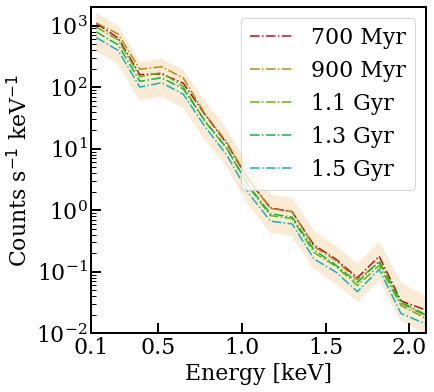

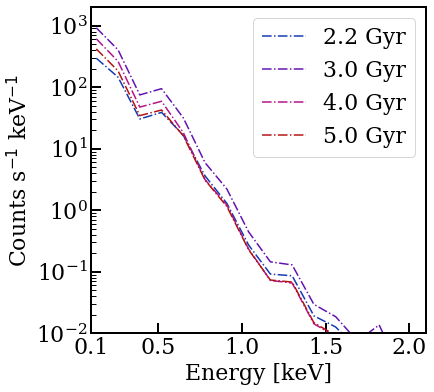

In [13]:
k = 0
base     = "/home/aditiv/CGM/Pyxsim/Spectra/"

hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 1., len(filename))
colors = [hsv2rgb(hue) for hue in hues]

label   = ['n6e-5$\Sigma$10M$_{\odot}$', 'n1e-6$\Sigma$3M$_{\odot}$']
short   = ["hdhsfr", "ldlsfr"]
color = ['forestgreen', 'navy', 'darkmagenta']

short   = ["hdhsfr", "ldlsfr"]



for fold in folder:
    f, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0., 'hspace':0.,},\
                        figsize=(6, 6))
    j = 0 
    hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
    hues = np.linspace(0, 1.0, len(filename))
    colors = [hsv2rgb(hue) for hue in hues]
    for file in filename:
        
        file_loc = base + fold +  file.split('/')[0] + '/'
        
        if(os.path.exists(file_loc)):
            sim_evntx   = np.loadtxt(file_loc + "sim_spec_LR.txt",usecols=0)
            sim_evnty   = np.loadtxt(file_loc + "sim_spec_LR.txt",usecols=1)
            if(time[j]=='1.3 Gyr'):
                ymin = sim_evnty/sim_evntx/2.
                ymax = sim_evnty*2/sim_evntx 
                ax.fill_between(sim_evntx, ymin, ymax, color='antiquewhite')
            plt.yscale('log')
            plt.ylabel(r'Counts s$^{-1}$ keV$^{-1}$') 
            ax.plot(sim_evntx, sim_evnty/sim_evntx, '-.',label=time[j], color=colors[j])
            
            ax.set_xlim(.1,2.1)
            plt.setp(ax, "xlabel", 'Energy [keV]')
            ax.legend()
            ax.set_ylabel(r'Counts s$^{-1}$ keV$^{-1}$') 
            plt.setp(ax, "ylim", (1.e-2, 2.e3))
            plt.setp(ax,'xticks',(0.1,0.5,1.0,1.5, 2.0))
            
        j = j + 1
    plt.savefig(base + short[k]  + '_spectrum_tseries_LR.pdf', bbox_inches='tight',dpi=160) 
    k = k + 1
                    

In [8]:
file_loc

'/home/aditiv/CGM/Pyxsim/Spectra/HR_0821_1e-6_SFR3/DD0500/'